<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solutions for </font>Superposition and Measurement </b></font>
<br>
_prepared by Abdullah Al Omar Galib_
<br><br>

<a id="task3"></a>
<h3> Task 3</h3>

Repeat the second experiment with the following modifications.

Start in state $ \ket{1} $.

Apply a Hadamard gate.

Make a measurement. 

If the measurement outcome is 0, stop.

Otherwise, apply a second Hadamard, and then make a measurement.

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

<h3> Solution </h3>

In [23]:
from pytket.circuit import Circuit, Qubit, Bit
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import tk_to_qiskit
from qiskit.tools.visualization import circuit_drawer

# Create a circuit with one qubit and one classical bit
circ = Circuit()
circ.add_q_register("q", 1)
circ.add_c_register("c", 1)

# Start in state |1>
circ.X(Qubit("q", 0))

# Apply the first Hadamard gate
circ.H(Qubit("q", 0))

# The first measurement
circ.Measure(Qubit("q", 0), Bit("c", 0))

# Apply the second Hadamard gate if the measurement outcome is 1
circ.H(Qubit("q", 0), condition_bits=[Bit("c", 0)], condition_value=1)

# The second measurement
circ.Measure(Qubit("q", 0), Bit("c", 0))

# Let's draw our circuit now 
render_circuit_jupyter(circ) # Render interactive circuit diagram

# Convert to Qiskit circuit and draw
qc = tk_to_qiskit(circ)
circuit_drawer(qc, output='mpl')


We expect to see outcome '0' and '1' with frequency %75 and %25, respectively.

In [24]:
# execute the circuit 1000 times in the local simulator
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

compiled_circ = backend.get_compiled_circuit(circ)

handle = backend.process_circuit(compiled_circ, n_shots=1000)
counts = backend.get_result(handle).get_counts()

print(counts) 

Counter({(0,): 758, (1,): 242})


<a id="task4"></a>
<h3> Task 4</h3>

Design the following quantum circuit.

Start in state $ \ket{0} $.

    Repeat 3 times:
        if the classical bit is 0:
            apply a Hadamard operator
        make a measurement

Execute your circuit 1000 times.

Calculate the expected values of observing '0' and '1', and then compare your result with the simulator result.

<h3> Solution </h3>

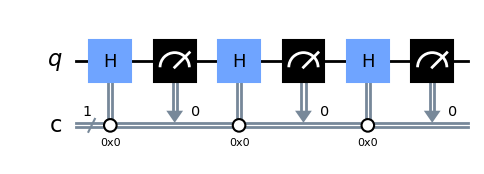

In [25]:
from pytket.circuit import Circuit, Qubit, Bit
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import tk_to_qiskit
from qiskit.tools.visualization import circuit_drawer

# Create a circuit with one qubit and one classical bit
circ = Circuit()
circ.add_q_register("q", 1)
circ.add_c_register("c", 1)

for i in range(3):
    # Apply the Hadamard gate to the qubit if the classical bit is 0
    circ.H(Qubit("q", 0), condition_bits=[Bit("c", 0)], condition_value=0)
    # Measure the qubit and write the output to the classical bit
    circ.Measure(Qubit("q", 0), Bit("c", 0))

# Let's draw our circuit now 
render_circuit_jupyter(circ) # Render interactive circuit diagram

# Convert to Qiskit circuit and draw
qc = tk_to_qiskit(circ)
circuit_drawer(qc, output='mpl')

We start in state $ \ket{0} $. Thus, the first Hadamard and measurement are implemented. 

Out of 1000, we expect to observe 500 '0' and 500 '1'.

If the classical bit is 1, then there will be no further Hadamard operator, and so the quantum register will always be in state $ \ket{1} $ and so all measurements results will be 1.

If the classical bit is 0, then another Hadamard applied followed by a measuement.

Thus, out ouf 1000, we expect to observe 250 '0' and 750 '1'.

Similarly, after the third control, we expect to observe 125 '0' and 875 '1'.

In [26]:
# execute the circuit 1000 times in the local simulator
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

compiled_circ = backend.get_compiled_circuit(circ)

handle = backend.process_circuit(compiled_circ, n_shots=1000)
counts = backend.get_result(handle).get_counts()

print(counts) 

Counter({(1,): 875, (0,): 125})


<a id="task5"></a>
<h3> Task 5</h3>

Design the following randomly created quantum circuit.

Start in state $ \ket{0} $.

    apply a Hadamard operator
    make a measurement
    REPEAT 4 times: 
        randomly pick x in {0,1}
        if the classical bit is x:
            apply a Hadamard operator
        make a measurement
        
Draw your circuit, and guess the expected frequency of observing '0' and '1' if the circuit is executed 10000 times.

Then, execute your circuit 10000 times, and compare your result with the simulator result.

Repeat execution a few more times.

<h3> Solution </h3>

We can calculate the frequencies iteratively by python.

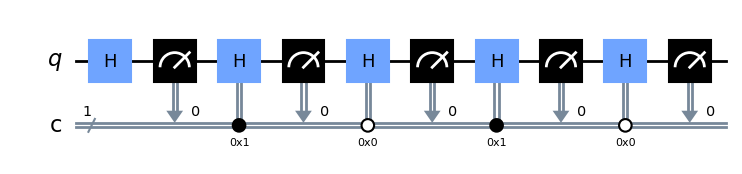

In [33]:
from pytket.circuit import Circuit, Qubit, Bit
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import tk_to_qiskit
from qiskit.tools.visualization import circuit_drawer

# Import randrange for random choices
from random import randrange

# Create a circuit with one qubit and one classical bit
circ = Circuit()
circ.add_q_register("q", 1)
circ.add_c_register("c", 1)

shot = 10000

observe = [0, 0]

circ.H(Qubit("q", 0))
circ.Measure(Qubit("q", 0), Bit("c", 0))
observe = [shot/2, shot/2]

for i in range(4):
    x = randrange(2)
    if x == 0:
        observe[0] = observe[0] / 2 
        observe[1] = observe[1] + observe[0]
    else:
        observe[1] = observe[1] / 2 
        observe[0] = observe[0] + observe[1]
    circ.H(Qubit("q", 0), condition_bits=[Bit("c", 0)], condition_value=x)
    circ.Measure(Qubit("q", 0), Bit("c", 0))

# Let's draw our circuit now 
render_circuit_jupyter(circ) # Render interactive circuit diagram

# Convert to Qiskit circuit and draw
qc = tk_to_qiskit(circ)
circuit_drawer(qc, output='mpl')


In [34]:
print('0:', round(observe[0]), '1:', round(observe[1]))

0: 3438 1: 6562


In [35]:
from pytket.extensions.qiskit import AerBackend
backend = AerBackend()

compiled_circ = backend.get_compiled_circuit(circ)

handle = backend.process_circuit(compiled_circ, n_shots = shot)
counts = backend.get_result(handle).get_counts()

print(counts) 

Counter({(1,): 6573, (0,): 3427})
